In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import copy

In [2]:
X=pd.read_csv(r'C:\ML\Carprice\car_price.csv')

In [3]:
Y=X.price 
X=X.drop(['price'],axis=1)

In [4]:
print(X.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [5]:
print('Null values in X',X.isnull().sum())
print('Null values in Y',Y.isnull().sum())

Null values in X car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64
Null values in Y 0


In [6]:
print(X.head())
print(Y.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  cylindernumber  \
0  convertible        rwd          front       88.6  ...            four   
1  convertible        rwd          front       88.6  ...            four   
2    hatchback        rwd          front       94.5  ...             six   
3        sedan        fwd          front       99.8  ...            four   
4        sedan        4wd          front       99.4  ...            five   

   enginesize  fuelsystem  boreratio stroke compressionr

In [7]:
print('Shape is',X.shape)


Shape is (205, 25)


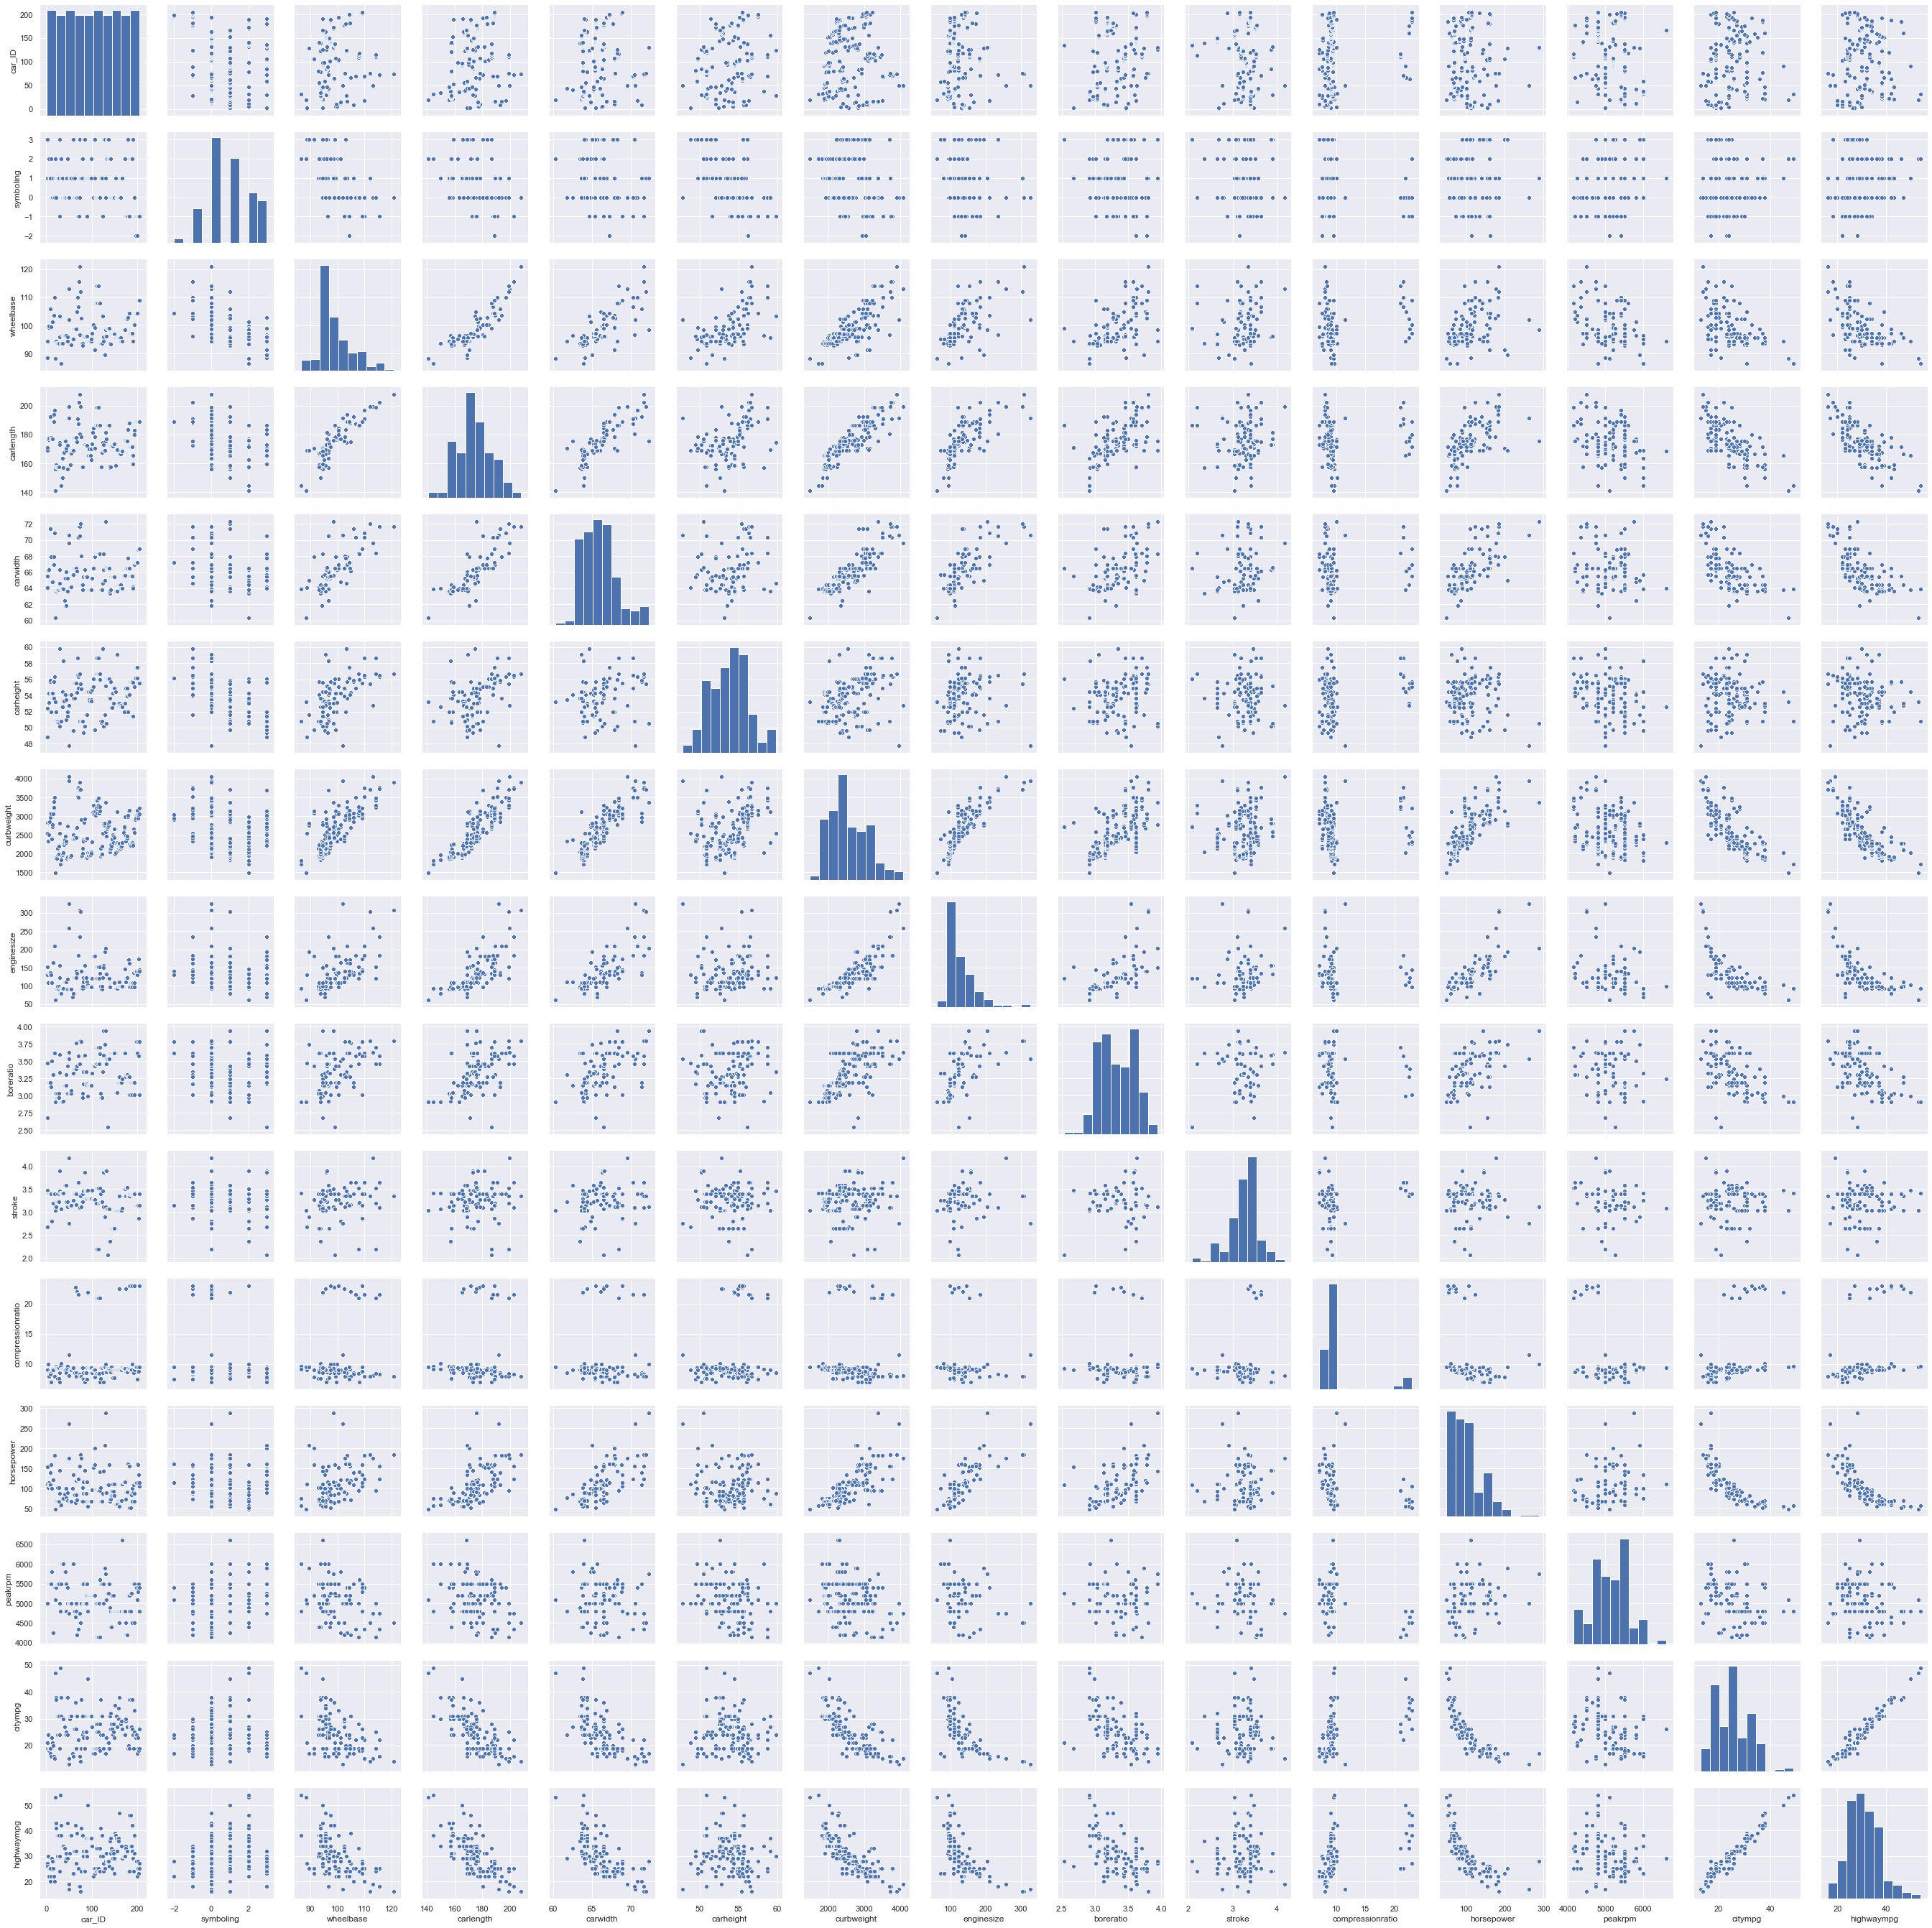

In [8]:
plt.rcParams["figure.figsize"] = [16,9]
sns.set(style="darkgrid")
sns.pairplot(data=X)

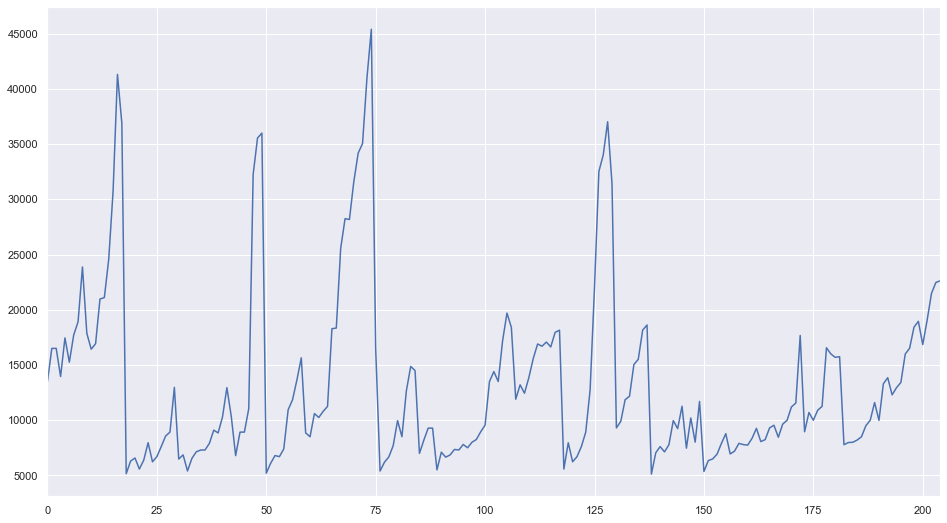

In [9]:
Y.plot()

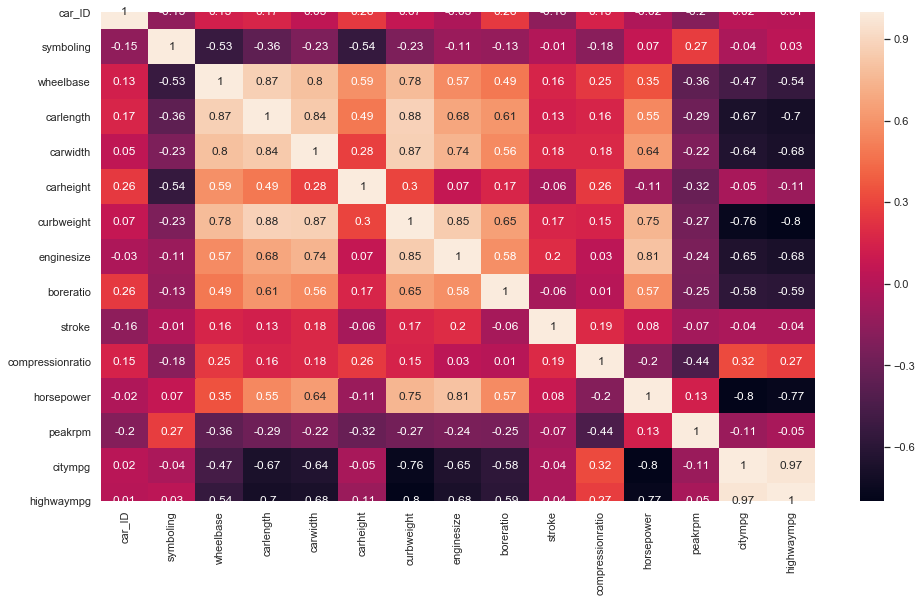

In [10]:
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
X["doornumber"]=X["doornumber"].replace({"four": 4, "two": 2})
X["cylindernumber"]=X["cylindernumber"].replace({"four": 4, "six": 6, "five":5, "eight":8, "two": 2, "twelve": 12, "three": 3})

In [12]:
Cat=X.select_dtypes(include=['object']).copy(deep='False')

In [13]:
print(Cat)

                      CarName fueltype aspiration      carbody drivewheel  \
0          alfa-romero giulia      gas        std  convertible        rwd   
1         alfa-romero stelvio      gas        std  convertible        rwd   
2    alfa-romero Quadrifoglio      gas        std    hatchback        rwd   
3                 audi 100 ls      gas        std        sedan        fwd   
4                  audi 100ls      gas        std        sedan        4wd   
..                        ...      ...        ...          ...        ...   
200           volvo 145e (sw)      gas        std        sedan        rwd   
201               volvo 144ea      gas      turbo        sedan        rwd   
202               volvo 244dl      gas        std        sedan        rwd   
203                 volvo 246   diesel      turbo        sedan        rwd   
204               volvo 264gl      gas      turbo        sedan        rwd   

    enginelocation enginetype fuelsystem  
0            front       dohc   

In [14]:
Cat=Cat.iloc[:, :].apply(pd.Series)
Name=Cat.CarName.copy()

In [15]:
print(Cat)
print(type(Cat))
print(Name)

                      CarName fueltype aspiration      carbody drivewheel  \
0          alfa-romero giulia      gas        std  convertible        rwd   
1         alfa-romero stelvio      gas        std  convertible        rwd   
2    alfa-romero Quadrifoglio      gas        std    hatchback        rwd   
3                 audi 100 ls      gas        std        sedan        fwd   
4                  audi 100ls      gas        std        sedan        4wd   
..                        ...      ...        ...          ...        ...   
200           volvo 145e (sw)      gas        std        sedan        rwd   
201               volvo 144ea      gas      turbo        sedan        rwd   
202               volvo 244dl      gas        std        sedan        rwd   
203                 volvo 246   diesel      turbo        sedan        rwd   
204               volvo 264gl      gas      turbo        sedan        rwd   

    enginelocation enginetype fuelsystem  
0            front       dohc   

In [16]:
Temp=[]
Temp=Name.str.split(pat=" ",expand=True)
print(Temp)

               0             1     2     3     4
0    alfa-romero        giulia  None  None  None
1    alfa-romero       stelvio  None  None  None
2    alfa-romero  Quadrifoglio  None  None  None
3           audi           100    ls  None  None
4           audi         100ls  None  None  None
..           ...           ...   ...   ...   ...
200        volvo          145e  (sw)  None  None
201        volvo         144ea  None  None  None
202        volvo         244dl  None  None  None
203        volvo           246  None  None  None
204        volvo         264gl  None  None  None

[205 rows x 5 columns]


In [17]:
Temp=Temp[0]
X.CarName=Temp
Cat.CarName=Temp
print(Cat.CarName)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [18]:
print(Cat.CarName)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [19]:
X["CarName"] = X["CarName"].replace({"maxda": "mazda", "porcshce": "porsche", "Nissan": "nissan", "vokswagen": "volkswagen", "toyouta": "toyota", "vw": "volkswagen"})

In [20]:
L=X.copy(deep="False")
L=pd.get_dummies(L, columns=Cat.columns)
print(L.head())
L.shape

   car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0       1          3           2       88.6      168.8      64.1       48.8   
1       2          3           2       88.6      168.8      64.1       48.8   
2       3          1           2       94.5      171.2      65.5       52.4   
3       4          2           4       99.8      176.6      66.2       54.3   
4       5          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  ...  enginetype_ohcv  \
0        2548               4         130  ...                0   
1        2548               4         130  ...                0   
2        2823               6         152  ...                1   
3        2337               4         109  ...                0   
4        2824               5         136  ...                0   

   enginetype_rotor  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                 0                0            

(205, 68)

In [21]:
Xs=scale(L)

In [22]:
print(Xs)

[[-1.72362229  1.74347043 -1.13038833 ...  1.08666971 -0.21428571
  -0.070014  ]
 [-1.70672403  1.74347043 -1.13038833 ...  1.08666971 -0.21428571
  -0.070014  ]
 [-1.68982577  0.133509   -1.13038833 ...  1.08666971 -0.21428571
  -0.070014  ]
 ...
 [ 1.68982577 -1.47645244  0.88465174 ...  1.08666971 -0.21428571
  -0.070014  ]
 [ 1.70672403 -1.47645244  0.88465174 ... -0.92024282 -0.21428571
  -0.070014  ]
 [ 1.72362229 -1.47645244  0.88465174 ...  1.08666971 -0.21428571
  -0.070014  ]]


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(Xs,Y,test_size=0.3,random_state=42)

In [24]:
X_train.shape

(143, 68)

In [25]:
X_test.shape

(62, 68)

In [26]:
Coef=LinearRegression()
Coef.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
Y_pred = Coef.predict(X_test)

In [28]:
print(Y_pred)

[29532.72863526 21493.36111182 10556.45138062 12883.61226848
 31398.66974366  6860.13487482  6003.73324795  7672.07204392
  8014.09835948  6655.92419812 14114.74495512  6803.43178993
 10833.60695296 10573.93335262 40003.72554559  5779.80692957
   622.69759997 13726.64272717  9195.15166147  7885.68610762
 10956.22000632 15595.84444616 10474.97961748  5558.84252481
  7015.27660479 30398.35216657 13355.24369985 16007.61474007
  6470.97565972 16142.59563571 30965.93249741  6395.90652674
  5844.5110177  19916.28691883  7704.20878532 34129.76788459
 10744.07154637 13357.02784166  9471.34169772 14391.21025911
  8189.07558979  9646.58026725 14094.20350795  5749.385911
  7027.90132105  9285.93702244  6794.39145281  5574.40896174
 16767.89653238 14682.23962315  6069.06123046 17114.48290691
  5065.57413876 10052.02690214  5881.05046807 15169.07620882
 13241.54951645 13489.36319169 33046.61868826  6371.02933911
  9204.24514213 16182.06970551]


In [29]:
print(X_test)

[[-1.47014842 -0.67147172  0.88465174 ...  1.08666971 -0.21428571
  -0.070014  ]
 [-1.57153797 -0.67147172 -1.13038833 ...  1.08666971 -0.21428571
  -0.070014  ]
 [-0.03379652 -0.67147172  0.88465174 ... -0.92024282 -0.21428571
  -0.070014  ]
 ...
 [-0.4393547   0.93848971 -1.13038833 ... -0.92024282 -0.21428571
  -0.070014  ]
 [ 0.70972682 -0.67147172  0.88465174 ... -0.92024282 -0.21428571
  -0.070014  ]
 [ 0.03379652  1.74347043 -1.13038833 ...  1.08666971 -0.21428571
  -0.070014  ]]


In [30]:
print('mse: %.2f'% mean_squared_error(Y_test,Y_pred))

mse: 8220796.20


In [31]:
print('vs:%.2f'%r2_score(Y_test,Y_pred))

vs:0.88
